In [143]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
import missingno

In [109]:
df = pd.read_csv("Data/bike_buyers.csv")

In [132]:
df.head()


,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1,Europe,36.0,Yes


In [110]:
df.shape

(1000, 13)

In [128]:
df.columns
print()

Index(['ID', 'Marital Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age',
       'Purchased Bike'],
      dtype='object')

In [138]:
categoric_columns = df.select_dtypes(include='object').columns
print("String_Columns = ",categoric_columns)
print()
numeric_columns = df.select_dtypes(include=['int64','float64']).columns
print("Numerical_Columns =",numeric_columns)

String_Columns =  Index(['Marital Status', 'Gender', 'Education', 'Occupation', 'Home Owner',
       'Commute Distance', 'Region', 'Purchased Bike'],
      dtype='object')

Numerical_Columns = Index(['ID', 'Income', 'Children', 'Cars', 'Age'], dtype='object')


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


In [112]:
df.dtypes

ID                    int64
Marital Status       object
Gender               object
Income              float64
Children            float64
Education            object
Occupation           object
Home Owner           object
Cars                float64
Commute Distance     object
Region               object
Age                 float64
Purchased Bike       object
dtype: object

In [114]:
df.duplicated("ID").sum()

0

In [139]:
df.isna().sum()

ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Purchased Bike      0
dtype: int64

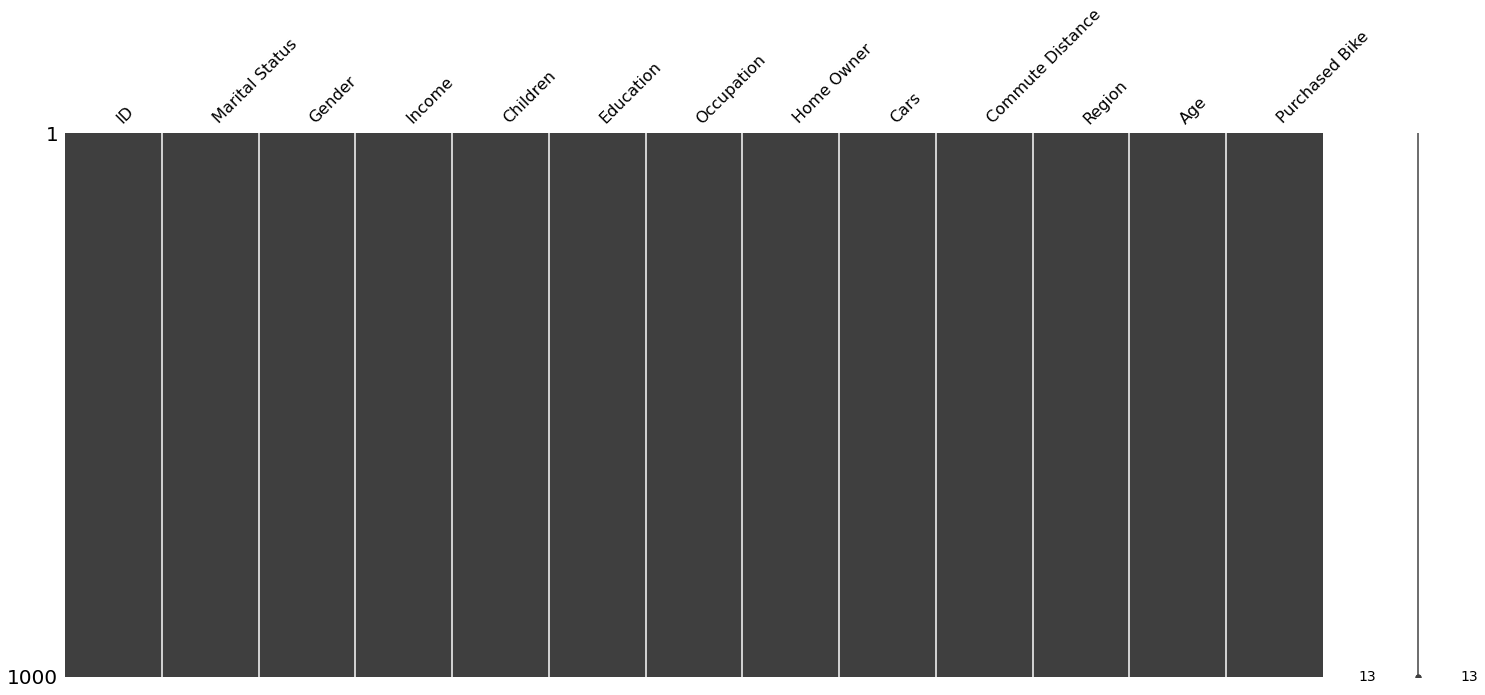

In [140]:
missingno.matrix(df)
plt.show()

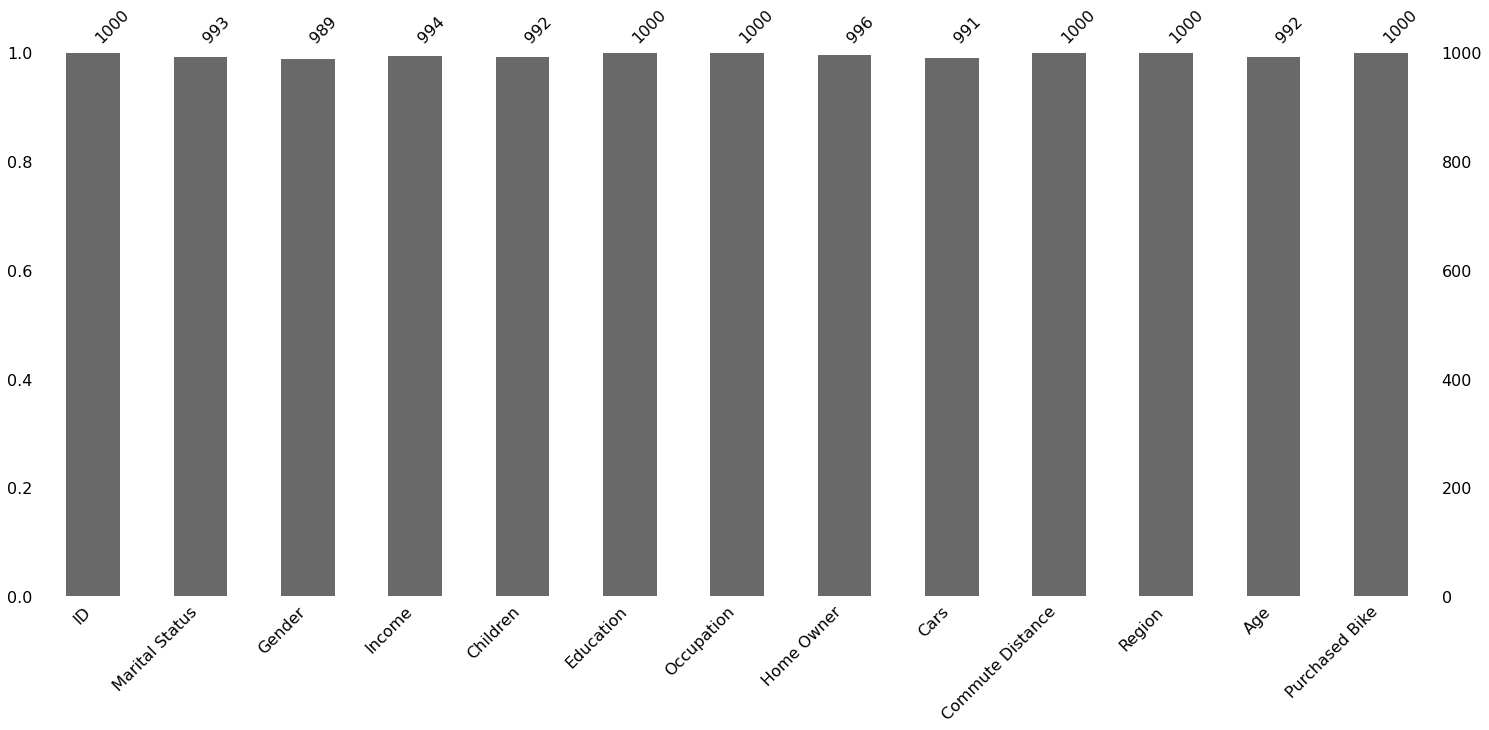

In [117]:
missingno.bar(df)
plt.show()

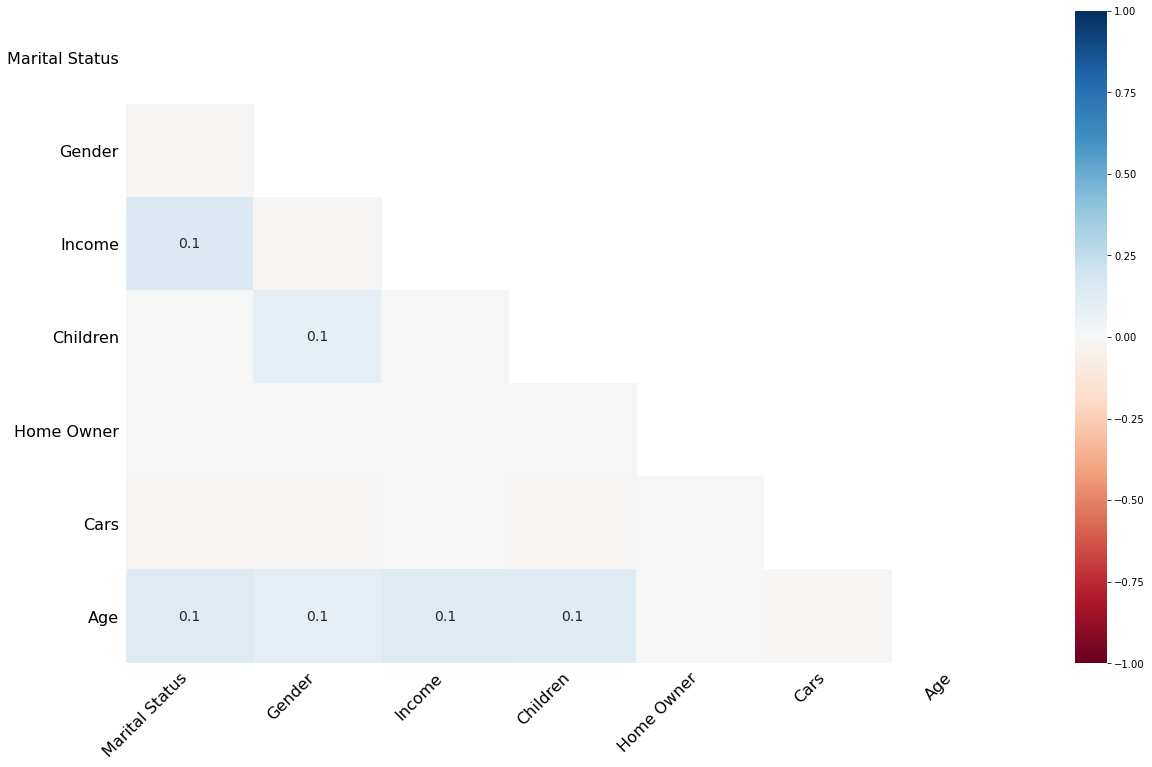

In [134]:
missingno.heatmap(df)
plt.show()

In [135]:
df['Income'].fillna(df['Income'].mean(),inplace=True)
df['Children'].fillna(df['Children'].mean(),inplace=True)
df['Cars'].fillna(df['Cars'].mean(),inplace=True)
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Marital Status'].fillna('NaN',inplace=True)
df['Gender'].fillna('NaN',inplace=True)
df['Home Owner'].fillna('NaN',inplace=True)

In [136]:
df.isna().sum()

ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Purchased Bike      0
dtype: int64

In [118]:
df['Commute Distance'] = df['Commute Distance'].apply(lambda x: x.replace(" Miles", " "))

In [123]:
num_cols = df.dtypes[df.dtypes != "O"].index.tolist()

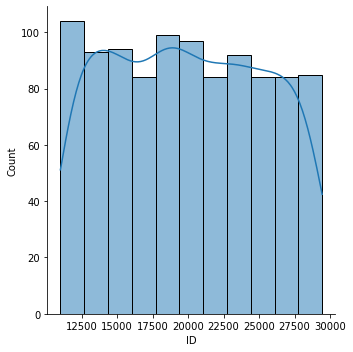

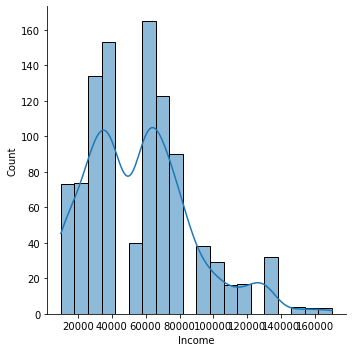

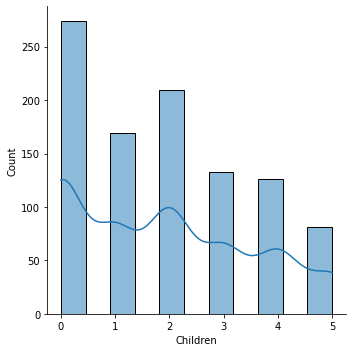

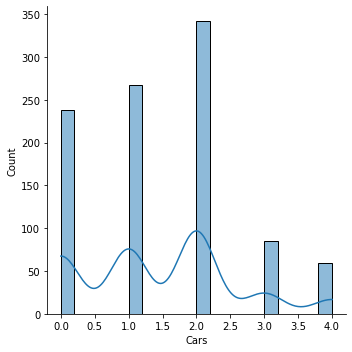

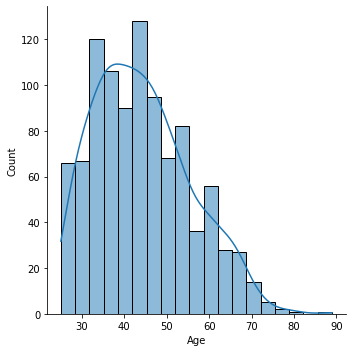

In [120]:
for c in num_cols:
    sns.displot(df[c], kde = True)
plt.show()

In [142]:
for column in df.columns:
    print(f"{column} : ",df[column].nunique())
    print(df[column].value_counts())
    print("**" * 30)
    

ID :  1000
28672    1
23908    1
27969    1
15682    1
25923    1
        ..
23801    1
23513    1
19143    1
19147    1
22527    1
Name: ID, Length: 1000, dtype: int64
************************************************************
Marital Status :  3
Married    535
Single     458
NaN          7
Name: Marital Status, dtype: int64
************************************************************
Gender :  3
Male      500
Female    489
NaN        11
Name: Gender, dtype: int64
************************************************************
Income :  17
60000.000000     165
40000.000000     153
30000.000000     134
70000.000000     123
80000.000000      90
20000.000000      74
10000.000000      73
50000.000000      40
90000.000000      38
130000.000000     32
100000.000000     29
120000.000000     17
110000.000000     16
56267.605634       6
150000.000000      4
170000.000000      3
160000.000000      3
Name: Income, dtype: int64
************************************************************
Children 